1. [AWS Step Function](#aws-step-function)
2. [State Machine](#state-machine)
3. [Types of state machines](#types-of-state-machines)
4. [Step Function - Task States](#step-function---task-states)
5. [Example JSON - Invoke Lambda function](#example-json---invoke-lambda-function)
6. [Step Function - States](#step-function---states)
7. [Hands On - Step Function](#hands-on---step-function)
8. [Step Function - Hello World Example](#step-function---hello-world-example)
9. [Step Function - Hands On Invoke Lambda function](#step-function---hands-on-invoke-lambda-function)
10. [Step Function - Error Handling](#step-function---error-handling)
11. [Step Function - Hands On Error Handling](#step-function---hands-on-error-handling)
12. [Step Function - Wait for Task Token](#step-function---wait-for-task-token)
13. [Step Function - Activity Tasks](#step-function---activity-tasks)
14. [Step Functions - Standard vs Express](#step-functions---standard-vs-express)

## AWS Step Function:
- Model workflows as state machines (one per workflow)
- Written in JSON
- Visualization of the workflow, execution of workflow, history, etc
- start workflow with SDK calls, API Gateway, EventBridge (cloudwatch events)

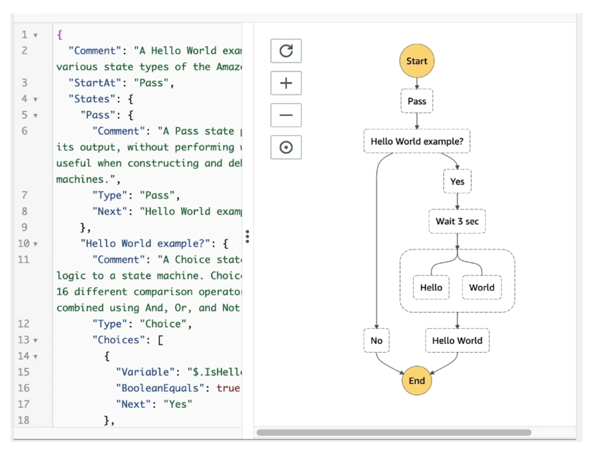

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/step_functions.jpeg')
new_image = img.resize((590, 450))
display(new_image)

### State Machine:
A state machine is a mathematical model that describes how a system changes state in response to inputs

In a state machine, an "activity" refers to a specific action or set of operations that are performed while the system is in a particular state

### Types of state machines:
- Deterministic finite state machines: 
    - These machines have a fixed order of events. 

- Non-deterministic finite state machines: 
    - These machines allow for more flexibility. 

- Mealy machines: 
    - These machines produce outputs only on transitions, not in states. 

- Moore machines: 
    - These machines produce outputs in states, not just on transitions. 

#### Step Function - Task States:
- Do some work in the state machine
- Invoke one AWS service
    - invoke Lambda function
    - invoke AWS Batch job
    - running ECS task
    - insert an item from DynamoDB
    - publish message to SQS, SNS
    - launch another step function workflow

All the above options can be defined in a task state

- Run on one Activity
    - EC2, ECS, on-premises
    - Activities poll the step function for work
    - Activities send back the result to Step Functions

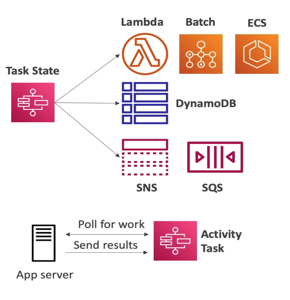

In [8]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/task_state.jpeg')
new_image = img.resize((290, 300))
display(new_image)

##### Example JSON - Invoke Lambda function:

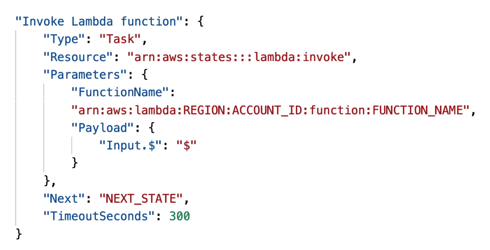

In [10]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/policy_task.jpeg')
new_image = img.resize((490, 250))
display(new_image)

#### Step Function - States:
- Choice State: Test for a condition to send to a branch
- Fail or Succeed State: Stop execution with failure or success
- Pass State: Simply pass the input as output of the state
- Wait State: provide some amount of delay in time
- Map State: Dynamically iterate steps
- Parallel State: Parallel branches of execution


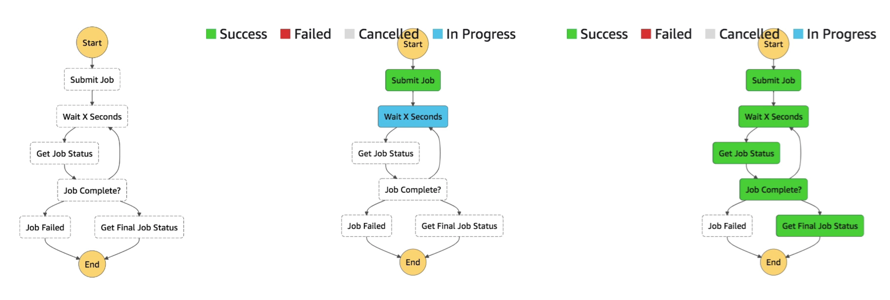

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/visual.jpeg')
new_image = img.resize((890, 300))
display(new_image)

#### Hands On - Step Function:
- Go to Step Function console
    - Get started
        - Create own
        - Choose Template
        - Choose Hello World Example *
            - Design 
                - Actions (Task States)
                - Flow (States)
                - Patterns (Sample Pattern for specific operation)
            - Code
                - ASL (Amazon Step Function Language)
            - Config
                - state machine name
                - type
                    - standard
                    - express
                - execution role
                - logging
                    - level
                - Additional configuration
                    - X-Ray tracing
                    - publish version on creation
                    - encrypt with customer managed key
        - Create


#### Step Function - Hello World Example:

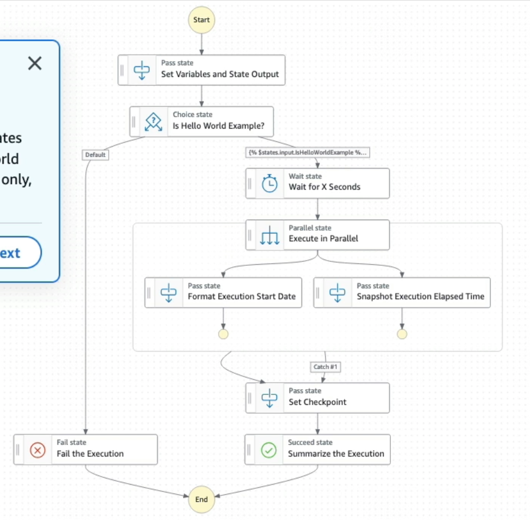

In [10]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/hello_world.jpeg')
new_image = img.resize((530, 520))
display(new_image)

- Set Variables and State Output (Pass State):


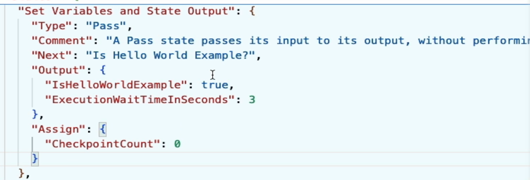

In [15]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/pass.jpeg')
new_image = img.resize((530, 180))
display(new_image)

- Is Hello World Example? (Choice state):

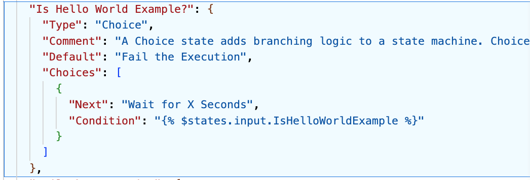

In [14]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/choice.jpeg')
new_image = img.resize((530, 180))
display(new_image)

- Fail the execution (Fail state):

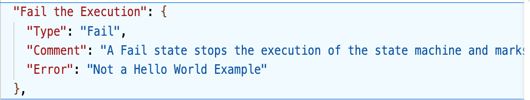

In [17]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/fail.jpeg')
new_image = img.resize((530, 100))
display(new_image)

- Wait for X Seconds (Wait state):

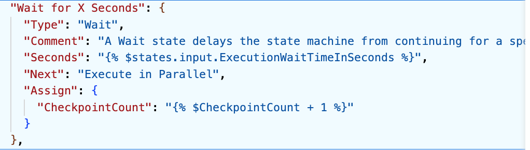

In [19]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/wait.jpeg')
new_image = img.resize((530, 150))
display(new_image)

- Execution in Parallel (Parallel state):

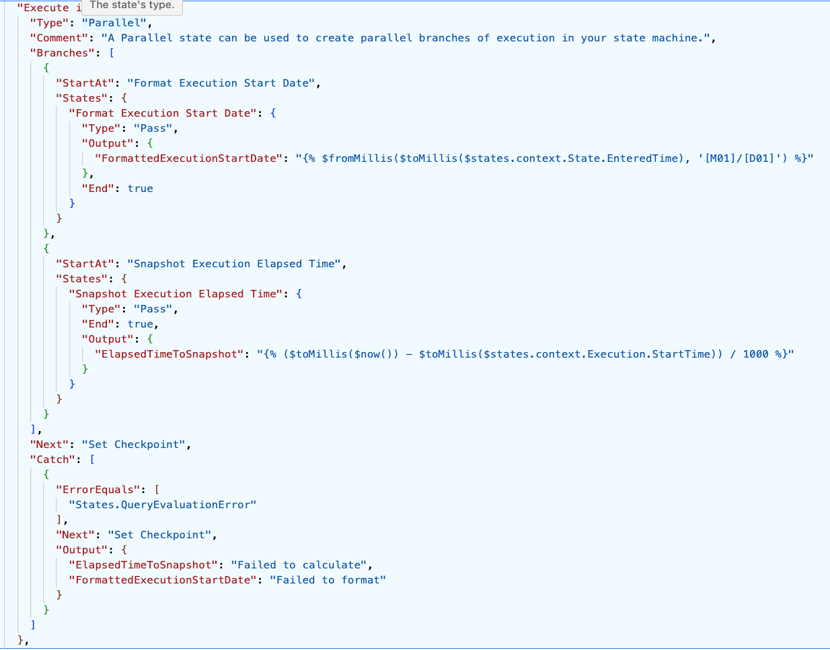

In [28]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/parallel.jpeg')
new_image = img.resize((830, 650))
display(new_image)

- Set Checkpoint (Pass state):

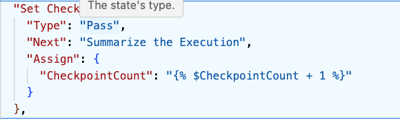

In [27]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/pass2.jpeg')
new_image = img.resize((400, 120))
display(new_image)

- Summarize the Execution (Succeed state):

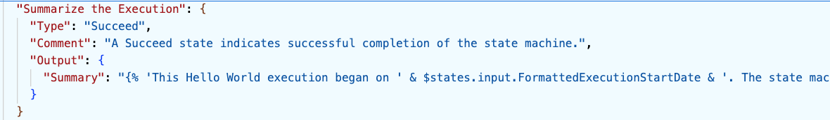

In [32]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/succeed.jpeg')
new_image = img.resize((830, 120))
display(new_image)

- Once the Hello World Example is created
- Start the execution
    - Name
    - Input JSON (optional)
- Scroll down to see the execution of Step Function
    - Graph View
    - Table View

#### Step Function - Hands On Invoke Lambda function:
- Step Function Code:

In [34]:
{
  "Comment": "A Hello World example of the Amazon States Language using Pass states",
  "StartAt": "Lambda Invoke",
  "States": {
    "Lambda Invoke": {
      "Type": "Task",
      "Resource": "arn:aws:states:::lambda:invoke",
      "OutputPath": "$.Payload",
      "Parameters": {
        "Payload.$": "$",
        "FunctionName": "<ENTER FUNCTION NAME HERE>"
      },
      "Retry": [
        {
          "ErrorEquals": [
            "Lambda.ServiceException",
            "Lambda.AWSLambdaException",
            "Lambda.SdkClientException",
            "Lambda.TooManyRequestsException"
          ],
          "IntervalSeconds": 1,
          "MaxAttempts": 3,
          "BackoffRate": 2
        }
      ],
      "Next": "Choice State"
    },
    "Choice State": {
      "Type": "Choice",
      "Choices": [
        {
          "Variable": "$",
          "StringMatches": "*Stephane*",
          "Next": "Is Teacher"
        }
      ],
      "Default": "Not Teacher"
    },
    "Is Teacher": {
      "Type": "Pass",
      "Result": "Woohoo!",
      "End": "true"
    },
    "Not Teacher": {
      "Type": "Fail",
      "Error": "ErrorCode",
      "Cause": "Stephane the teacher wasn't found in the output of the Lambda Function"
    }
  }
}

{'Comment': 'A Hello World example of the Amazon States Language using Pass states',
 'StartAt': 'Lambda Invoke',
 'States': {'Lambda Invoke': {'Type': 'Task',
   'Resource': 'arn:aws:states:::lambda:invoke',
   'OutputPath': '$.Payload',
   'Parameters': {'Payload.$': '$',
    'FunctionName': '<ENTER FUNCTION NAME HERE>'},
   'Retry': [{'ErrorEquals': ['Lambda.ServiceException',
      'Lambda.AWSLambdaException',
      'Lambda.SdkClientException',
      'Lambda.TooManyRequestsException'],
     'IntervalSeconds': 1,
     'MaxAttempts': 3,
     'BackoffRate': 2}],
   'Next': 'Choice State'},
  'Choice State': {'Type': 'Choice',
   'Choices': [{'Variable': '$',
     'StringMatches': '*Stephane*',
     'Next': 'Is Teacher'}],
   'Default': 'Not Teacher'},
  'Is Teacher': {'Type': 'Pass', 'Result': 'Woohoo!', 'End': 'true'},
  'Not Teacher': {'Type': 'Fail',
   'Error': 'ErrorCode',
   'Cause': "Stephane the teacher wasn't found in the output of the Lambda Function"}}}

- Input JSON:

In [35]:
{
    "who": "Stephane Maarek"
}

{'who': 'Stephane Maarek'}

- Lambda function:

In [ ]:
export const handler = async (event) => {
    return "Hello, " + event.who + "!";
  };

#### Step Function - Error Handling:
- Any state can encounter runtime errors for various reasons
    - State machine definition issues
    - Transient issues
    - Task failures
- Use Retry & Catch in state machine to handle errors than in application code
- Pre-defined error code:
    - States.ALL: matches any errors
    - States.Timeout: task run longer than timeout or no heartbeat received
    - States.TaskFailed: execution failure
    - States.Permissions: insufficient privileges 
- state may report its own errors

Retry:
- evaluated from top to bottom
- ErrorEquals: match a specific kind of error
- IntervalSeconds: initial delay before retry
- BackoffRate: multiple the delay after each retry
- MaxAttempts: default 3, set to 0 for never retried
- When retry is maxed out then Catch is called

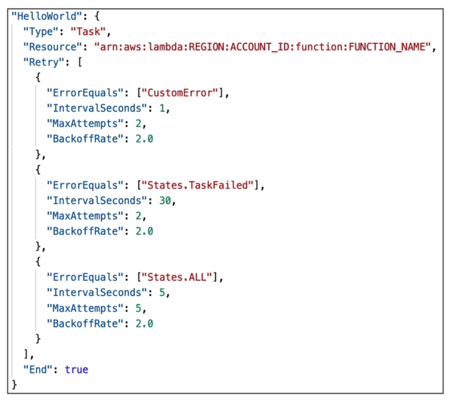

In [41]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/retry.jpeg')
new_image = img.resize((450, 400))
display(new_image)

Catch:
- evaluated from top to bottom
- ErrorEquals: match an error
- Next: state to send to
- ResultPath: an input send to next state mentioned

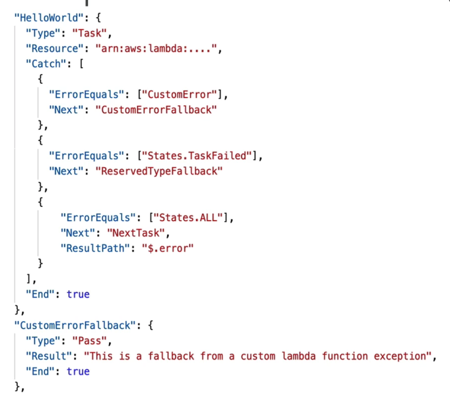

In [42]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/catch.jpeg')
new_image = img.resize((450, 400))
display(new_image)

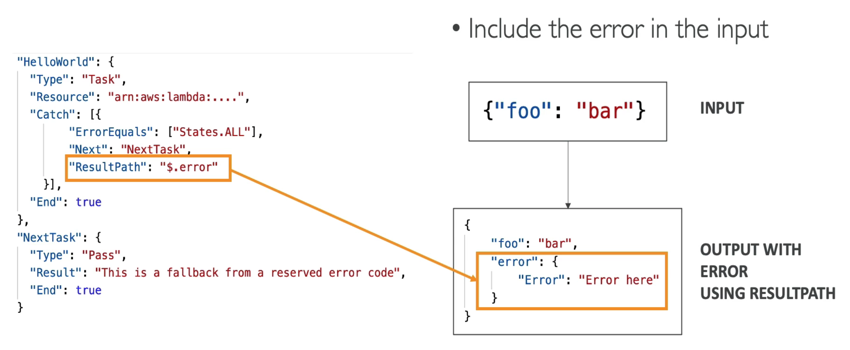

In [50]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/catcherror.jpeg')
new_image = img.resize((850, 350))
display(new_image)

#### Step Function - Hands On Error Handling:
- Create a Lambda function
    - From blueprint (type step-function)
        - Choose Custom Error lambda function
    - Create 

- Copy the below template into Step Function

In [45]:
{
    "Comment": "A Retry and Catch example of the Amazon States Language using an AWS Lambda Function",
    "StartAt": "InvokeMyFunction",
    "States": {
      "InvokeMyFunction": {
        "Type": "Task",
        "Resource": "<enter resource ARN here>",
        "Retry": [
          {
            "ErrorEquals": [
              "CustomError"
            ],
            "IntervalSeconds": 1,
            "MaxAttempts": 2,
            "BackoffRate": 2
          },
          {
            "ErrorEquals": [
              "States.TaskFailed"
            ],
            "IntervalSeconds": 30,
            "MaxAttempts": 2,
            "BackoffRate": 2
          },
          {
            "ErrorEquals": [
              "States.ALL"
            ],
            "IntervalSeconds": 5,
            "MaxAttempts": 5,
            "BackoffRate": 2
          }
        ],
        "Catch": [
          {
            "ErrorEquals": [
              "CustomError"
            ],
            "Next": "CustomErrorFallback"
          },
          {
            "ErrorEquals": [
              "States.TaskFailed"
            ],
            "Next": "ReservedTypeFallback"
          },
          {
            "ErrorEquals": [
              "States.ALL"
            ],
            "Next": "CatchAllFallback"
          }
        ],
        "End": "true"
      },
      "CustomErrorFallback": {
        "Type": "Pass",
        "Result": "This is a fallback from a custom lambda function exception",
        "End": "true"
      },
      "ReservedTypeFallback": {
        "Type": "Pass",
        "Result": "This is a fallback from a reserved error code",
        "End": "true"
      },
      "CatchAllFallback": {
        "Type": "Pass",
        "Result": "This is a fallback from a reserved error code",
        "End": "true"
      }
    }
  }

{'Comment': 'A Retry and Catch example of the Amazon States Language using an AWS Lambda Function',
 'StartAt': 'InvokeMyFunction',
 'States': {'InvokeMyFunction': {'Type': 'Task',
   'Resource': '<enter resource ARN here>',
   'Retry': [{'ErrorEquals': ['CustomError'],
     'IntervalSeconds': 1,
     'MaxAttempts': 2,
     'BackoffRate': 2},
    {'ErrorEquals': ['States.TaskFailed'],
     'IntervalSeconds': 30,
     'MaxAttempts': 2,
     'BackoffRate': 2},
    {'ErrorEquals': ['States.ALL'],
     'IntervalSeconds': 5,
     'MaxAttempts': 5,
     'BackoffRate': 2}],
   'Catch': [{'ErrorEquals': ['CustomError'], 'Next': 'CustomErrorFallback'},
    {'ErrorEquals': ['States.TaskFailed'], 'Next': 'ReservedTypeFallback'},
    {'ErrorEquals': ['States.ALL'], 'Next': 'CatchAllFallback'}],
   'End': 'true'},
  'CustomErrorFallback': {'Type': 'Pass',
   'Result': 'This is a fallback from a custom lambda function exception',
   'End': 'true'},
  'ReservedTypeFallback': {'Type': 'Pass',
   'Resu

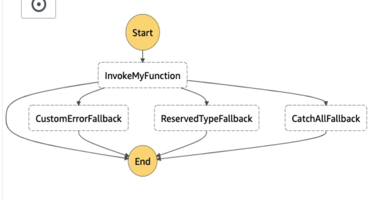

In [48]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/catcherror1.jpeg')
new_image = img.resize((380, 200))
display(new_image)

#### Step Function - Wait for Task Token:
- allows to pause step function until the task token is returned
- Task might wait for other AWS services, human approval, 3rd party integration, etc
- Append .waitForTaskToken to Resource field to tell step functions to wait for the task token to be returned
- Task will pause until it receives that Task Token back with a SendTaskSuccess or SendTaskFailure API call

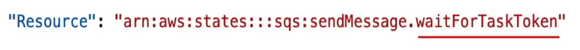

In [52]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/waitfortoken.jpeg')
new_image = img.resize((580, 50))
display(new_image)

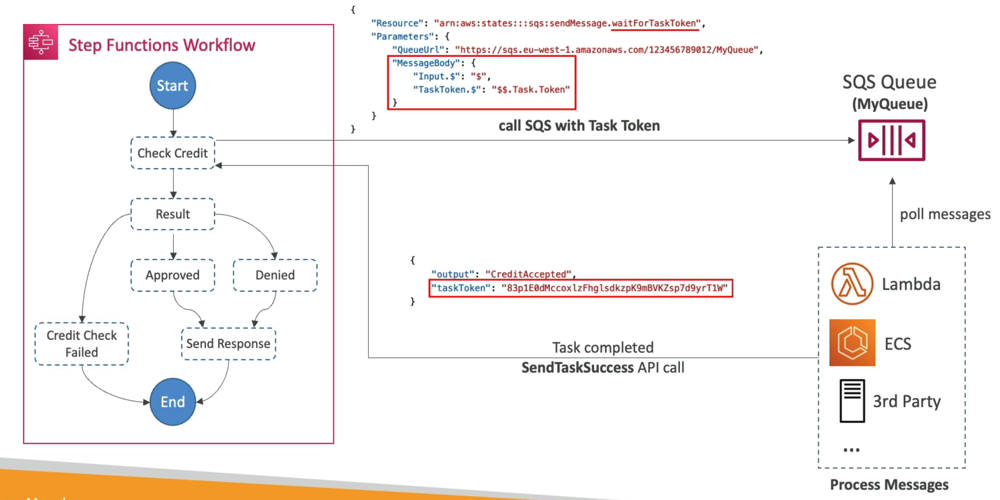

In [60]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/waitfortoken1.jpeg')
new_image = img.resize((1000, 500))
display(new_image)

#### Step Function - Activity Tasks:
- Enables to have Task work performed by an Activity Worker
- Activity workers would be running on EC2, Lambda, mobile devices, etc
- Activity worker polls for Task using GetActivityTask API
- After Activity worker completes the Task, it sends response of its success/failure using SendTaskSuccess/SendTaskFailure
- To keep Task active:
    - use TimeoutSeconds to keep the Task wait 
    - Periodically, send a HeartBeat from Activity Worker using SendTaskHeartBeat within the time you set in HeartBeatSeconds

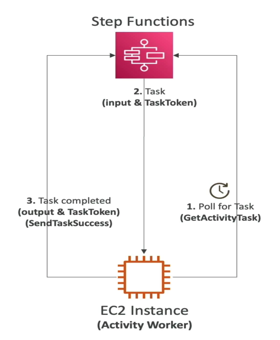

In [62]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/activitytask.jpeg')
new_image = img.resize((280, 340))
display(new_image)

#### Step Functions - Standard vs Express:

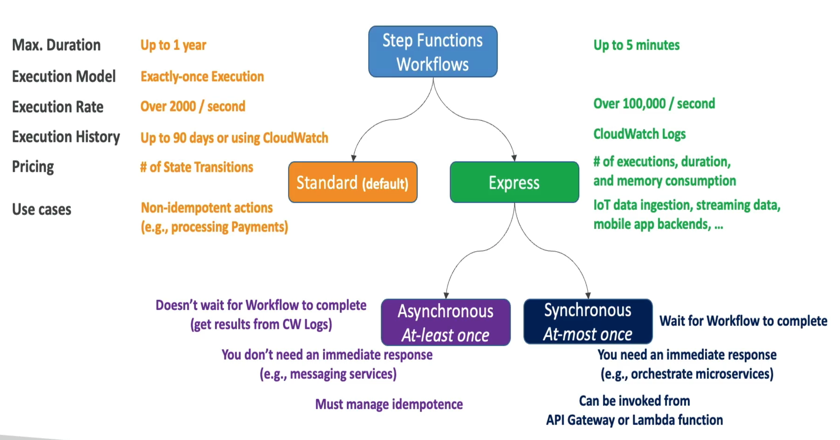

In [64]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/types.jpeg')
new_image = img.resize((840, 440))
display(new_image)